In [1]:
import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
url="https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv"

Data= pd.read_csv(url)

In [3]:
x=np.float64(Data['x'])
y=np.float64(Data['y'])
theta=[1,1,1]
sigma=1

In [21]:
M= lambda x,theta: (theta[0]/(theta[1]+np.exp(-theta[2]*x)))

In [5]:
chi=0
for i in range(len(x)):
    chi+= (y[i]-M(x[i],theta))**2

In [6]:
def GetFit(x,y,n):
    
    DataSize = x.shape[0]
    
    b = y
    
    A = np.ones((DataSize,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
    
    AT = np.dot(A.T,A)
    bT = A.T @ b

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [7]:
param = GetFit(x,y,6)
param

array([ 2.27271654e+00,  9.01909984e-01,  8.23207483e-03, -1.85208111e-02,
       -2.16298808e-04,  1.28183181e-04,  1.10173465e-06])

In [8]:
def GetModel(x,p):
    
    y = 0
    for n in range(len(p)):
        y += p[n]*x**n
        
    return y

In [9]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

1.10173465234765e-6*x**6 + 0.000128183180653924*x**5 - 0.000216298807750147*x**4 - 0.0185208110579657*x**3 + 0.00823207483446652*x**2 + 0.901909983831775*x + 2.27271653867336

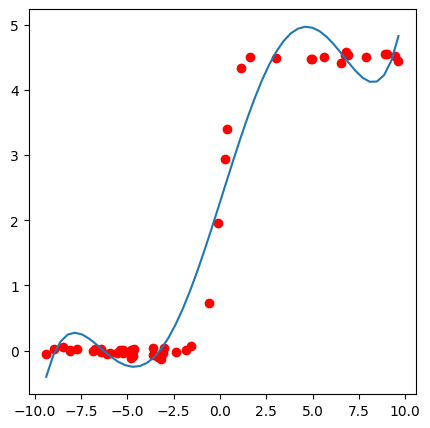

In [10]:
t = np.linspace(np.min(x),np.max(x),50)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.plot(t,GetModel(t,param))
ax.scatter(x,y,color="r")